### Модель линейной регрессии

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=500):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
    
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for epoch in range(self.epochs):
            y_pred = X @ self.weights + self.bias
            
            error = y_pred - y
            
            dw = (2 / n_samples) * X.T @ (y_pred - y)
            db = (2 / n_samples) * np.sum(y_pred - y)
            
            # обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return X @ self.weights + self.bias

In [34]:
df = pd.read_csv('a05_salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [35]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1 / 3, random_state = 0)
model = LinearRegression(learning_rate = 0.01, epochs = 500)
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

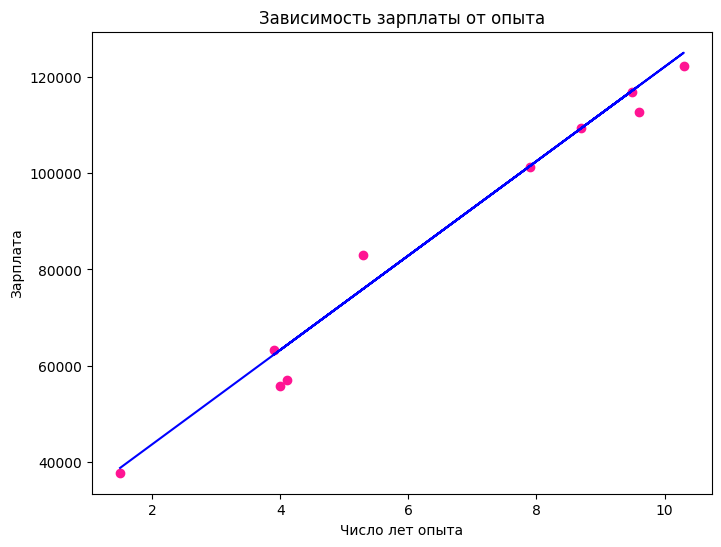

In [36]:
plt.figure(figsize = (8, 6))
plt.scatter(X_test, Y_test, color = 'deeppink')
plt.plot(X_test, Y_predict, color = 'blue')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')

plt.show()